In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('myopia.csv')

df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
X = df.drop('MYOPIC', axis=1)
y = df['MYOPIC']

In [4]:
df1= df.drop('MYOPIC', axis=1)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [5]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
df_x = StandardScaler().fit_transform(df1)
print(df_x[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [10]:
df1_pca = pca.fit_transform(df_x)
df1_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00]])

In [11]:
print(pca.components_)

[[ 0.29943632 -0.23557685  0.43385722  0.27187928 -0.25484995  0.40919082
   0.15331623  0.22308667  0.18663053  0.29236309  0.1563252   0.37626239
   0.02394087  0.01185764]
 [ 0.07481307  0.11938336 -0.35512084 -0.25319434  0.29488801 -0.34420164
   0.10224397  0.37276848  0.19939742  0.32330593  0.19567693  0.49394049
  -0.09060117 -0.01809029]
 [ 0.3506736   0.40509421 -0.00643243 -0.08335354 -0.20551571  0.07010645
   0.03622729  0.06300538 -0.32831163  0.27207587 -0.3321881  -0.09468094
  -0.46534578 -0.36855107]]


In [12]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023])

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=90)

In [25]:
tsne_features = tsne.fit_transform(df1_pca)

c:\Users\leond\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [26]:
tsne_features.shape

(618, 2)

In [27]:
df1['x'] = tsne_features[:,0]

# The second column of transformed features
df1['y'] = tsne_features[:,1]

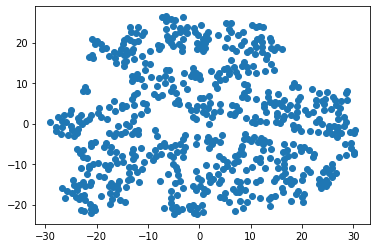

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df1['x'], df1['y'])
plt.show()

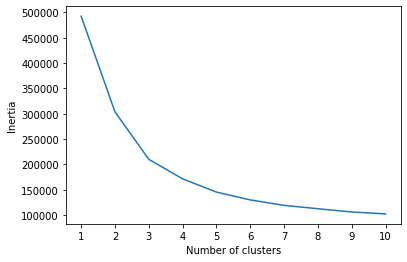

In [ ]:
from sklearn.cluster import KMeans
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df1)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
df_elbow

,k,inertia
0,1,492285.797300
1,2,303479.339703
2,3,209901.390043
3,4,171368.523308
4,5,145242.656342
5,6,129787.068792
6,7,119019.385474
7,8,112391.321339
8,9,105996.464985
9,10,102148.139351


According to the Kmeans, it is possible to cluster the patients. Our model shows that inertia levels off after k=8.
